# Predição de tumores de câncer de mama 

Este projeto teve o objetivo de testar do desempenho de uma rede neural simples com um modelo de boosting de árvores de decisão, ambos de classificação supervisionada, com a normalização dos dados e sem a normalização, para a predizer se um tumor de câncer de mama é benígno ou malígno de acordo com o dataset disponibilizado pelo site do Kaggle. Link do daset abaixo:

https://www.kaggle.com/venkatkarthick/breast-cancercsv/metadata

### 1. Análise exploratória

In [797]:
# importando as bibliotecas 

import pandas as pd # ferramenta de análise de dados
from feature_engine.encoding import OneHotEncoder  # faz o one hot encoding
from sklearn.model_selection import train_test_split # separa dados de treino e teste
from sklearn.preprocessing import  MinMaxScaler # normaliza os dados deixando-os entre 0 e 1
from sklearn.neural_network import MLPClassifier # modelo de rede neural MLP
from xgboost import XGBClassifier, train # modelo de boosting de árvores de decisão
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score # métricas de avaliação
from sklearn.metrics import classification_report # relatório das métricas
from sklearn.metrics import plot_confusion_matrix # matriz de confusão
import matplotlib.pyplot as plt # ferramneta de visualização de dados


import warnings # ignorar avisos
warnings.filterwarnings("ignore")

In [798]:
# carregando o dataset
df = pd.read_csv("breast_cancer.csv")

In [799]:
# exibindo as 5 primeiras linhas
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [800]:
# exibindo as dimensões do dataset
df.shape

(569, 33)

In [801]:
# exibindo as informações do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [802]:
# soma dos valores nulos das colunas
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [803]:
# identificando nossa coluna target
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Nos códigos acima podmeos ver que:
1. Temos duas colunas que são inúteis para o uso, como a coluna 'id' e a coluna 'Unnamed: 32 ' que tem todos os valores nulos, a seguir iremos jogá-las fora.
2. Nosso target é a coluna 'diagnosis', que usa 'B' com benígno e 'M' como malígno.
3. A coluna target está com valores binários, porém do tipo string, teremos que arrumar isso, porém os modelos de predição não reconhecem esse tipo de dado.

### 2. Tratamento dos dados

In [804]:
# excluindo as colunas 'id' e 'Unnamed: 32'

df = df.drop(['id', 'Unnamed: 32'], axis = 1)

In [805]:
# tranformando valores string em valores categóricos numéricos

df['diagnosis'] = [0 if item  == 'B' else 1 for item in df['diagnosis']]

In [806]:
# Agora benígno ficou == 0 e Malígno == 1 

df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [807]:
# correlações de todas as variáveis com a variável "diagnosis"
df.corr().iloc[0]

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

In [808]:
# excluindo colunas quase nenhuma correlação com a variável target

df = df.drop(['fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se'], axis = 1)

In [809]:
# separando a variável target das independentes

X = df.drop(columns=['diagnosis'])
Y = df[['diagnosis']]

In [810]:
# separando em dados de treino(80%) e teste(20%) para o modelo

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 12)

In [811]:
# dimensões dos dados d etreino e teste

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 25), (114, 25), (455, 1), (114, 1))

### 3. Implementando os modelos sem normalização dos dados

##### MLP rede neural

In [812]:
clf = MLPClassifier(hidden_layer_sizes=(100,50,10), max_iter=1000)

In [813]:
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=1000)

In [814]:
y_pred = clf.predict(X_test)

In [815]:
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 88.59649122807018%
Precision: 92.6829268292683%
Recall: 79.16666666666666%
F1: 85.39325842696628%


##### XG Boosting

In [816]:
clf = XGBClassifier(n_estimators=300)

In [817]:
clf.fit(X_train, y_train)

[22:15:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [818]:
y_pred = clf.predict(X_test)

In [819]:
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 95.6140350877193%
Precision: 97.77777777777777%
Recall: 91.66666666666666%
F1: 94.6236559139785%


### 4. Implementando os modelos com  dados normalizados

##### Normalizando base de entrada do modelo

In [820]:
# chamando o modelo de normalização

min_max_scaler = MinMaxScaler()

In [821]:
# treinando o modelo

min_max_scaler.fit(X_train)

MinMaxScaler()

In [822]:
# fazendo a tranformação dos dados 

X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

##### MLP rede neural

In [823]:
# chamando o modelo
clf = MLPClassifier(hidden_layer_sizes=(100,50,10), max_iter=1000)

In [824]:
# treinando o modelo
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=1000)

In [825]:
# testando o modelo
y_pred = clf.predict(X_test)

In [826]:
# obtendo as métricas de avaliação do modelo

print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 96.49122807017544%
Precision: 100.0%
Recall: 91.66666666666666%
F1: 95.65217391304348%


In [827]:
# relatório das métricas de avalição
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        66
           1       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



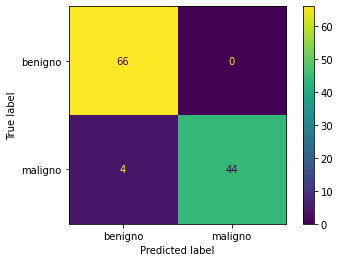

In [828]:
# matriz de confusão para as métricas de avaliaçaõ do modelo
plot_confusion_matrix(clf, X_test, y_test, display_labels=["benigno", "maligno"], values_format='d')
plt.grid(False)
plt.show()

##### XG Boosting

In [829]:
clf = XGBClassifier(n_estimators=300)

In [830]:
clf.fit(X_train, y_train)

[22:15:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [831]:
y_pred = clf.predict(X_test)

In [832]:
print(f"Acccuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Precision: {precision_score(y_test, y_pred)*100}%")
print(f"Recall: {recall_score(y_test, y_pred)*100}%")
print(f"F1: {f1_score(y_test, y_pred)*100}%")

Acccuracy: 95.6140350877193%
Precision: 97.77777777777777%
Recall: 91.66666666666666%
F1: 94.6236559139785%


In [833]:
# relatório das métricas de avalição
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        66
           1       0.98      0.92      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



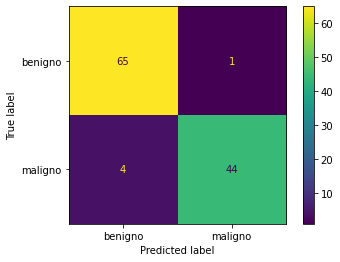

In [834]:
# matriz de confusão para as métricas de avaliaçaõ do modelo

plot_confusion_matrix(clf, X_test, y_test, display_labels=["benigno", "maligno"], values_format='d')
plt.grid(False)
plt.show()

### Conclusão

Como podemos ver acima, alguns modelos precisam de que os dados sejem normalizados, outros não. A Rede Neural MLP teve uma performance abaixo do XG Boosting com os dados sem normalização, porém quando houve a normalização, o XG Boosting continuou com a mesma performance e a MLP teve uma performance muito melhor do que o XG Boosting, por este motivo, devemos ter conhecimento de como funciona o modelo que estamos utilizando para saber se é necessário ou não fazer a normalização dos dados.

Observando as métricas de avaliação, pelos dados estarem desbalanceados, ou seja, ter mais rsultados benígnos do que malígnos, a acurácia não é uma boa métrica, pois ela não reflete bem com valores desbalanceados e ao mesmo tempo o F1 score é a melhor métrica para este problema, pois ele reflete uma média entre as métricas de precisão e recall.